
# Image classification with a Convolutional Neural Network

## Malaria cell classification

Malaria is a blood disease caused by the *Plasmodium* parasite, and is transmitted through the bite of the female *Anopheles* mosquito. The disease is mostly diagnosed by counting parasitized blood cells in a blood smear under a microscope. However, manual cell counting is an exhausting, error-prone procedure. This can negatively affect the quality of the diagnosis [[1]](https://peerj.com/articles/4568/). Especially in *resource-constrained* regions of the world, difficult working conditions lead to poor diagnosis quality [[2]](https://lhncbc.nlm.nih.gov/publication/pub9932) .

In this practical session we will develop a deep learning pipeline that will aid in improving malaria diagnosis by automating infected cell counting. To this end we will use the Malaria cell dataset [[2]](https://lhncbc.nlm.nih.gov/publication/pub9932) to train a neural network that predicts a cell's infection state based on a microscopy image of it. The microscopy images were acquired using a smartphone attached to a small portable microscope.

To set up the deep learning pipeline we will go through these steps:
- Load the dataset
- Preprocess the dataset
- Define a neural network
- Define the learning procedure
- Train the neural network
- Inspect the network's performance

We will use the [TensorFlow machine learning framework](http://tensorflow.org) to implement these steps.

# Setup

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import os

C:\Users\Daniel\anaconda3\envs\conda_environment_M14\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tf.random.set_seed(42)

In [3]:
from tensorflow.python.client import device_lib

def select_device(prefer_gpu=True):
    local_device_protos = device_lib.list_local_devices()
    gpus = [x.name for x in local_device_protos if x.device_type == 'GPU']
    if (len(gpus) > 0) and prefer_gpu:
        return gpus[0]
    else:
        return [x.name for x in local_device_protos if x.device_type == 'CPU'][0]

In [4]:
# This code sets the device to use to GPU if you have one available
device = select_device(prefer_gpu=True)
device

'/device:GPU:0'

The above `device` is used in the notebook to select where code is executed. This is done with a `with`-statement:
```
with tf.device(device):
    # code
```

# Load the Malaria dataset

We use the `tensorflow-datasets` package to load the malaria dataset:

In [13]:
# The dataset has been recently moved and tensorflow-datasets hasn't been updated yet,
# so we update the URL manually
tfds.image_classification.malaria._URL="https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip"

# Now we can create the builder
builder = tfds.builder('malaria') #, data_dir=os.path.join(".", "data"))

In [14]:
builder.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|          | 0/337 [00:00<?, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]
Dl Size...:   0%|          | 1/337 [00:03<18:20,  3.28s/ MiB]

Extraction completed...: 0 file [00:03, ? file/s]
Dl Size...:   1%|          | 2/337 [00:04<11:19,  2.03s/ MiB]

Extraction completed...: 0 file [00:04, ? file/s]
Dl Size...:   1%|          | 3/337 [00:05<08:10,  1.47s/ MiB]

Extraction completed...: 0 file [00:05, ? file/s]
Dl Size...:   1%|          | 4/337 [00:05<06:13,  1.12s/ MiB]

Extraction completed...: 0 file [00:05, ? file/s]
Dl Size...:   1%|▏         | 5/337 [00:06<04:56,  1.12 MiB/s]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:   2%|▏         | 6/337 [00:06<03:58,  1.39 MiB/s]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:   2%|▏         | 7/337 [00:07<03:14,

Dl Size...:  12%|█▏        | 42/337 [00:17<02:16,  2.15 MiB/s]

Extraction completed...: 0 file [00:17, ? file/s]
Dl Size...:  13%|█▎        | 43/337 [00:18<02:50,  1.73 MiB/s]

Extraction completed...: 0 file [00:18, ? file/s]
Dl Size...:  13%|█▎        | 44/337 [00:19<03:09,  1.55 MiB/s]

Extraction completed...: 0 file [00:19, ? file/s]
Dl Size...:  13%|█▎        | 45/337 [00:20<03:25,  1.42 MiB/s]

Extraction completed...: 0 file [00:20, ? file/s]
Dl Size...:  14%|█▎        | 46/337 [00:21<03:36,  1.34 MiB/s]

Extraction completed...: 0 file [00:21, ? file/s]
Dl Size...:  14%|█▍        | 47/337 [00:21<03:41,  1.31 MiB/s]

Extraction completed...: 0 file [00:21, ? file/s]
Dl Size...:  14%|█▍        | 48/337 [00:22<03:46,  1.27 MiB/s]

Extraction completed...: 0 file [00:22, ? file/s]
Dl Size...:  15%|█▍        | 49/337 [00:23<03:49,  1.25 MiB/s]

Extraction completed...: 0 file [00:23, ? file/s]
Dl Size...:  15%|█▍        | 50/337 [00:24<03:50,  1.25 MiB/s]

Extraction completed...:

Extraction completed...: 0 file [00:53, ? file/s]
Dl Size...:  26%|██▌       | 86/337 [00:54<03:57,  1.05 MiB/s]

Extraction completed...: 0 file [00:54, ? file/s]
Dl Size...:  26%|██▌       | 87/337 [00:55<03:47,  1.10 MiB/s]

Extraction completed...: 0 file [00:55, ? file/s]
Dl Size...:  26%|██▌       | 88/337 [00:56<03:34,  1.16 MiB/s]

Extraction completed...: 0 file [00:56, ? file/s]
Dl Size...:  26%|██▋       | 89/337 [00:57<03:34,  1.16 MiB/s]

Extraction completed...: 0 file [00:57, ? file/s]
Dl Size...:  27%|██▋       | 90/337 [00:57<03:30,  1.17 MiB/s]

Extraction completed...: 0 file [00:57, ? file/s]
Dl Size...:  27%|██▋       | 91/337 [00:58<03:26,  1.19 MiB/s]

Extraction completed...: 0 file [00:58, ? file/s]
Dl Size...:  27%|██▋       | 92/337 [00:59<03:25,  1.19 MiB/s]

Extraction completed...: 0 file [00:59, ? file/s]
Dl Size...:  28%|██▊       | 93/337 [01:00<03:23,  1.20 MiB/s]

Extraction completed...: 0 file [01:00, ? file/s]
Dl Size...:  28%|██▊       | 94/337 [0

Extraction completed...: 0 file [01:29, ? file/s]
Dl Size...:  38%|███▊      | 129/337 [01:30<02:51,  1.21 MiB/s]

Extraction completed...: 0 file [01:30, ? file/s]
Dl Size...:  39%|███▊      | 130/337 [01:30<02:51,  1.21 MiB/s]

Extraction completed...: 0 file [01:30, ? file/s]
Dl Size...:  39%|███▉      | 131/337 [01:31<02:49,  1.21 MiB/s]

Extraction completed...: 0 file [01:31, ? file/s]
Dl Size...:  39%|███▉      | 132/337 [01:32<02:48,  1.22 MiB/s]

Extraction completed...: 0 file [01:32, ? file/s]
Dl Size...:  39%|███▉      | 133/337 [01:33<02:48,  1.21 MiB/s]

Extraction completed...: 0 file [01:33, ? file/s]
Dl Size...:  40%|███▉      | 134/337 [01:34<02:47,  1.22 MiB/s]

Extraction completed...: 0 file [01:34, ? file/s]
Dl Size...:  40%|████      | 135/337 [01:35<02:46,  1.22 MiB/s]

Extraction completed...: 0 file [01:35, ? file/s]
Dl Size...:  40%|████      | 136/337 [01:35<02:45,  1.22 MiB/s]

Extraction completed...: 0 file [01:35, ? file/s]
Dl Size...:  41%|████      | 1

Dl Size...:  51%|█████     | 171/337 [02:04<02:16,  1.21 MiB/s]

Extraction completed...: 0 file [02:04, ? file/s]
Dl Size...:  51%|█████     | 172/337 [02:05<02:15,  1.21 MiB/s]

Extraction completed...: 0 file [02:05, ? file/s]
Dl Size...:  51%|█████▏    | 173/337 [02:06<02:15,  1.21 MiB/s]

Extraction completed...: 0 file [02:06, ? file/s]
Dl Size...:  52%|█████▏    | 174/337 [02:07<02:14,  1.22 MiB/s]

Extraction completed...: 0 file [02:07, ? file/s]
Dl Size...:  52%|█████▏    | 175/337 [02:08<02:13,  1.21 MiB/s]

Extraction completed...: 0 file [02:08, ? file/s]
Dl Size...:  52%|█████▏    | 176/337 [02:08<02:13,  1.21 MiB/s]

Extraction completed...: 0 file [02:08, ? file/s]
Dl Size...:  53%|█████▎    | 177/337 [02:09<02:12,  1.20 MiB/s]

Extraction completed...: 0 file [02:09, ? file/s]
Dl Size...:  53%|█████▎    | 178/337 [02:10<02:11,  1.21 MiB/s]

Extraction completed...: 0 file [02:10, ? file/s]
Dl Size...:  53%|█████▎    | 179/337 [02:11<02:10,  1.21 MiB/s]

Extraction comp

Dl Size...:  64%|██████▎   | 214/337 [02:40<01:42,  1.20 MiB/s]

Extraction completed...: 0 file [02:40, ? file/s]
Dl Size...:  64%|██████▍   | 215/337 [02:41<01:40,  1.21 MiB/s]

Extraction completed...: 0 file [02:41, ? file/s]
Dl Size...:  64%|██████▍   | 216/337 [02:41<01:39,  1.21 MiB/s]

Extraction completed...: 0 file [02:41, ? file/s]
Dl Size...:  64%|██████▍   | 217/337 [02:42<01:39,  1.21 MiB/s]

Extraction completed...: 0 file [02:42, ? file/s]
Dl Size...:  65%|██████▍   | 218/337 [02:43<01:37,  1.22 MiB/s]

Extraction completed...: 0 file [02:43, ? file/s]
Dl Size...:  65%|██████▍   | 219/337 [02:44<01:37,  1.21 MiB/s]

Extraction completed...: 0 file [02:44, ? file/s]
Dl Size...:  65%|██████▌   | 220/337 [02:45<01:37,  1.21 MiB/s]

Extraction completed...: 0 file [02:45, ? file/s]
Dl Size...:  66%|██████▌   | 221/337 [02:46<01:35,  1.21 MiB/s]

Extraction completed...: 0 file [02:46, ? file/s]
Dl Size...:  66%|██████▌   | 222/337 [02:46<01:34,  1.21 MiB/s]

Extraction comp

Extraction completed...: 0 file [03:15, ? file/s]
Dl Size...:  76%|███████▋  | 257/337 [03:16<01:05,  1.22 MiB/s]

Extraction completed...: 0 file [03:15, ? file/s]
Dl Size...:  77%|███████▋  | 258/337 [03:16<01:05,  1.21 MiB/s]

Extraction completed...: 0 file [03:16, ? file/s]
Dl Size...:  77%|███████▋  | 259/337 [03:17<01:04,  1.22 MiB/s]

Extraction completed...: 0 file [03:17, ? file/s]
Dl Size...:  77%|███████▋  | 260/337 [03:18<01:03,  1.21 MiB/s]

Extraction completed...: 0 file [03:18, ? file/s]
Dl Size...:  77%|███████▋  | 261/337 [03:19<01:03,  1.21 MiB/s]

Extraction completed...: 0 file [03:19, ? file/s]
Dl Size...:  78%|███████▊  | 262/337 [03:20<01:01,  1.22 MiB/s]

Extraction completed...: 0 file [03:20, ? file/s]
Dl Size...:  78%|███████▊  | 263/337 [03:20<01:01,  1.21 MiB/s]

Extraction completed...: 0 file [03:20, ? file/s]
Dl Size...:  78%|███████▊  | 264/337 [03:21<01:00,  1.22 MiB/s]

Extraction completed...: 0 file [03:21, ? file/s]
Dl Size...:  79%|███████▊  | 2

Dl Size...:  89%|████████▊ | 299/337 [03:50<00:32,  1.17 MiB/s]

Extraction completed...: 0 file [03:50, ? file/s]
Dl Size...:  89%|████████▉ | 300/337 [03:51<00:30,  1.22 MiB/s]

Extraction completed...: 0 file [03:51, ? file/s]
Dl Size...:  89%|████████▉ | 301/337 [03:52<00:29,  1.22 MiB/s]

Extraction completed...: 0 file [03:52, ? file/s]
Dl Size...:  90%|████████▉ | 302/337 [03:53<00:28,  1.22 MiB/s]

Extraction completed...: 0 file [03:53, ? file/s]
Dl Size...:  90%|████████▉ | 303/337 [03:53<00:27,  1.22 MiB/s]

Extraction completed...: 0 file [03:53, ? file/s]
Dl Size...:  90%|█████████ | 304/337 [03:54<00:27,  1.21 MiB/s]

Extraction completed...: 0 file [03:54, ? file/s]
Dl Size...:  91%|█████████ | 305/337 [03:55<00:26,  1.22 MiB/s]

Extraction completed...: 0 file [03:55, ? file/s]
Dl Size...:  91%|█████████ | 306/337 [03:56<00:25,  1.21 MiB/s]

Extraction completed...: 0 file [03:56, ? file/s]
Dl Size...:  91%|█████████ | 307/337 [03:57<00:24,  1.21 MiB/s]

Extraction comp

Generating train examples...: 2 examples [00:00, 18.27 examples/s]
Generating train examples...: 13 examples [00:00, 66.47 examples/s]
Generating train examples...: 27 examples [00:00, 94.27 examples/s]
Generating train examples...: 37 examples [00:00, 83.71 examples/s]
Generating train examples...: 50 examples [00:00, 94.21 examples/s]
Generating train examples...: 62 examples [00:00, 101.90 examples/s]
Generating train examples...: 73 examples [00:00, 90.84 examples/s] 
Generating train examples...: 83 examples [00:00, 86.67 examples/s]
Generating train examples...: 95 examples [00:01, 95.34 examples/s]
Generating train examples...: 109 examples [00:01, 104.73 examples/s]
Generating train examples...: 120 examples [00:01, 102.46 examples/s]
Generating train examples...: 131 examples [00:01, 103.77 examples/s]
Generating train examples...: 142 examples [00:01, 103.24 examples/s]
Generating train examples...: 153 examples [00:01, 98.08 examples/s] 
Generating train examples...: 166 exa

Generating train examples...: 1325 examples [00:12, 95.83 examples/s] 
Generating train examples...: 1336 examples [00:13, 96.01 examples/s]
Generating train examples...: 1348 examples [00:13, 100.40 examples/s]
Generating train examples...: 1359 examples [00:13, 96.41 examples/s] 
Generating train examples...: 1369 examples [00:13, 94.99 examples/s]
Generating train examples...: 1381 examples [00:13, 98.63 examples/s]
Generating train examples...: 1393 examples [00:13, 104.32 examples/s]
Generating train examples...: 1404 examples [00:13, 105.69 examples/s]
Generating train examples...: 1417 examples [00:13, 111.45 examples/s]
Generating train examples...: 1429 examples [00:13, 111.42 examples/s]
Generating train examples...: 1441 examples [00:14, 101.96 examples/s]
Generating train examples...: 1452 examples [00:14, 95.76 examples/s] 
Generating train examples...: 1464 examples [00:14, 102.02 examples/s]
Generating train examples...: 1476 examples [00:14, 106.86 examples/s]
Generatin

Generating train examples...: 2640 examples [00:25, 115.37 examples/s]
Generating train examples...: 2655 examples [00:25, 121.31 examples/s]
Generating train examples...: 2668 examples [00:25, 115.70 examples/s]
Generating train examples...: 2681 examples [00:26, 116.45 examples/s]
Generating train examples...: 2695 examples [00:26, 119.49 examples/s]
Generating train examples...: 2708 examples [00:26, 119.13 examples/s]
Generating train examples...: 2720 examples [00:26, 116.20 examples/s]
Generating train examples...: 2732 examples [00:26, 104.97 examples/s]
Generating train examples...: 2743 examples [00:26, 103.43 examples/s]
Generating train examples...: 2754 examples [00:26, 102.28 examples/s]
Generating train examples...: 2766 examples [00:26, 103.12 examples/s]
Generating train examples...: 2781 examples [00:26, 115.75 examples/s]
Generating train examples...: 2793 examples [00:27, 116.83 examples/s]
Generating train examples...: 2806 examples [00:27, 120.48 examples/s]
Genera

Generating train examples...: 3908 examples [00:38, 91.18 examples/s]
Generating train examples...: 3918 examples [00:38, 91.08 examples/s]
Generating train examples...: 3930 examples [00:38, 96.39 examples/s]
Generating train examples...: 3945 examples [00:38, 108.08 examples/s]
Generating train examples...: 3962 examples [00:38, 121.65 examples/s]
Generating train examples...: 3976 examples [00:39, 123.42 examples/s]
Generating train examples...: 3990 examples [00:39, 124.53 examples/s]
Generating train examples...: 4008 examples [00:39, 136.22 examples/s]
Generating train examples...: 4022 examples [00:39, 133.55 examples/s]
Generating train examples...: 4036 examples [00:39, 130.11 examples/s]
Generating train examples...: 4050 examples [00:39, 120.32 examples/s]
Generating train examples...: 4063 examples [00:39, 110.97 examples/s]
Generating train examples...: 4075 examples [00:39, 98.70 examples/s] 
Generating train examples...: 4089 examples [00:40, 106.14 examples/s]
Generatin

Generating train examples...: 5338 examples [00:51, 107.94 examples/s]
Generating train examples...: 5349 examples [00:51, 101.36 examples/s]
Generating train examples...: 5363 examples [00:51, 108.82 examples/s]
Generating train examples...: 5374 examples [00:51, 106.25 examples/s]
Generating train examples...: 5385 examples [00:51, 100.23 examples/s]
Generating train examples...: 5397 examples [00:51, 101.43 examples/s]
Generating train examples...: 5408 examples [00:51, 98.07 examples/s] 
Generating train examples...: 5418 examples [00:51, 96.09 examples/s]
Generating train examples...: 5431 examples [00:52, 102.48 examples/s]
Generating train examples...: 5442 examples [00:52, 101.45 examples/s]
Generating train examples...: 5453 examples [00:52, 97.21 examples/s] 
Generating train examples...: 5465 examples [00:52, 100.67 examples/s]
Generating train examples...: 5477 examples [00:52, 103.11 examples/s]
Generating train examples...: 5488 examples [00:52, 102.11 examples/s]
Generat

Generating train examples...: 6651 examples [01:03, 80.66 examples/s]
Generating train examples...: 6664 examples [01:04, 91.58 examples/s]
Generating train examples...: 6675 examples [01:04, 94.03 examples/s]
Generating train examples...: 6685 examples [01:04, 93.13 examples/s]
Generating train examples...: 6697 examples [01:04, 97.89 examples/s]
Generating train examples...: 6707 examples [01:04, 91.94 examples/s]
Generating train examples...: 6717 examples [01:04, 91.64 examples/s]
Generating train examples...: 6730 examples [01:04, 99.41 examples/s]
Generating train examples...: 6740 examples [01:04, 98.01 examples/s]
Generating train examples...: 6751 examples [01:04, 97.40 examples/s]
Generating train examples...: 6761 examples [01:05, 81.72 examples/s]
Generating train examples...: 6770 examples [01:05, 82.44 examples/s]
Generating train examples...: 6782 examples [01:05, 90.43 examples/s]
Generating train examples...: 6792 examples [01:05, 92.94 examples/s]
Generating train exa

Generating train examples...: 7995 examples [01:16, 95.76 examples/s]
Generating train examples...: 8005 examples [01:16, 95.95 examples/s]
Generating train examples...: 8016 examples [01:16, 98.74 examples/s]
Generating train examples...: 8026 examples [01:16, 90.76 examples/s]
Generating train examples...: 8036 examples [01:16, 86.47 examples/s]
Generating train examples...: 8046 examples [01:17, 89.98 examples/s]
Generating train examples...: 8059 examples [01:17, 96.66 examples/s]
Generating train examples...: 8069 examples [01:17, 94.88 examples/s]
Generating train examples...: 8080 examples [01:17, 97.29 examples/s]
Generating train examples...: 8090 examples [01:17, 93.77 examples/s]
Generating train examples...: 8100 examples [01:17, 91.41 examples/s]
Generating train examples...: 8110 examples [01:17, 92.90 examples/s]
Generating train examples...: 8121 examples [01:17, 96.54 examples/s]
Generating train examples...: 8132 examples [01:17, 99.18 examples/s]
Generating train exa

Generating train examples...: 9281 examples [01:29, 129.27 examples/s]
Generating train examples...: 9294 examples [01:29, 126.87 examples/s]
Generating train examples...: 9307 examples [01:29, 123.57 examples/s]
Generating train examples...: 9320 examples [01:29, 118.58 examples/s]
Generating train examples...: 9332 examples [01:29, 110.02 examples/s]
Generating train examples...: 9346 examples [01:29, 113.65 examples/s]
Generating train examples...: 9359 examples [01:29, 116.91 examples/s]
Generating train examples...: 9373 examples [01:29, 119.19 examples/s]
Generating train examples...: 9385 examples [01:30, 108.46 examples/s]
Generating train examples...: 9397 examples [01:30, 99.51 examples/s] 
Generating train examples...: 9408 examples [01:30, 100.99 examples/s]
Generating train examples...: 9420 examples [01:30, 102.02 examples/s]
Generating train examples...: 9432 examples [01:30, 106.13 examples/s]
Generating train examples...: 9445 examples [01:30, 107.94 examples/s]
Genera

Generating train examples...: 10556 examples [01:41, 101.62 examples/s]
Generating train examples...: 10568 examples [01:41, 106.69 examples/s]
Generating train examples...: 10579 examples [01:41, 107.50 examples/s]
Generating train examples...: 10591 examples [01:42, 107.81 examples/s]
Generating train examples...: 10602 examples [01:42, 101.50 examples/s]
Generating train examples...: 10613 examples [01:42, 97.00 examples/s] 
Generating train examples...: 10625 examples [01:42, 100.82 examples/s]
Generating train examples...: 10637 examples [01:42, 106.04 examples/s]
Generating train examples...: 10648 examples [01:42, 100.12 examples/s]
Generating train examples...: 10661 examples [01:42, 106.14 examples/s]
Generating train examples...: 10674 examples [01:42, 110.73 examples/s]
Generating train examples...: 10687 examples [01:42, 112.50 examples/s]
Generating train examples...: 10699 examples [01:43, 111.96 examples/s]
Generating train examples...: 10714 examples [01:43, 118.52 exam

Generating train examples...: 11771 examples [01:53, 92.72 examples/s] 
Generating train examples...: 11781 examples [01:53, 92.16 examples/s]
Generating train examples...: 11792 examples [01:54, 96.86 examples/s]
Generating train examples...: 11802 examples [01:54, 87.99 examples/s]
Generating train examples...: 11812 examples [01:54, 89.16 examples/s]
Generating train examples...: 11825 examples [01:54, 99.09 examples/s]
Generating train examples...: 11840 examples [01:54, 111.77 examples/s]
Generating train examples...: 11854 examples [01:54, 117.06 examples/s]
Generating train examples...: 11866 examples [01:54, 112.82 examples/s]
Generating train examples...: 11878 examples [01:54, 102.83 examples/s]
Generating train examples...: 11889 examples [01:55, 104.24 examples/s]
Generating train examples...: 11901 examples [01:55, 108.39 examples/s]
Generating train examples...: 11913 examples [01:55, 107.85 examples/s]
Generating train examples...: 11924 examples [01:55, 107.43 examples/

Generating train examples...: 13076 examples [02:06, 89.23 examples/s] 
Generating train examples...: 13088 examples [02:06, 93.77 examples/s]
Generating train examples...: 13099 examples [02:06, 97.88 examples/s]
Generating train examples...: 13110 examples [02:06, 97.42 examples/s]
Generating train examples...: 13122 examples [02:06, 99.32 examples/s]
Generating train examples...: 13133 examples [02:06, 101.76 examples/s]
Generating train examples...: 13144 examples [02:06, 99.48 examples/s] 
Generating train examples...: 13155 examples [02:06, 89.39 examples/s]
Generating train examples...: 13169 examples [02:06, 102.21 examples/s]
Generating train examples...: 13180 examples [02:07, 96.85 examples/s] 
Generating train examples...: 13190 examples [02:07, 97.16 examples/s]
Generating train examples...: 13200 examples [02:07, 93.94 examples/s]
Generating train examples...: 13210 examples [02:07, 95.45 examples/s]
Generating train examples...: 13221 examples [02:07, 99.17 examples/s]
G

Generating train examples...: 14310 examples [02:18, 115.48 examples/s]
Generating train examples...: 14322 examples [02:18, 112.09 examples/s]
Generating train examples...: 14334 examples [02:18, 114.26 examples/s]
Generating train examples...: 14346 examples [02:18, 110.52 examples/s]
Generating train examples...: 14362 examples [02:18, 123.09 examples/s]
Generating train examples...: 14375 examples [02:19, 121.17 examples/s]
Generating train examples...: 14388 examples [02:19, 118.18 examples/s]
Generating train examples...: 14400 examples [02:19, 113.07 examples/s]
Generating train examples...: 14412 examples [02:19, 112.69 examples/s]
Generating train examples...: 14425 examples [02:19, 117.50 examples/s]
Generating train examples...: 14439 examples [02:19, 123.76 examples/s]
Generating train examples...: 14453 examples [02:19, 125.00 examples/s]
Generating train examples...: 14466 examples [02:19, 121.22 examples/s]
Generating train examples...: 14479 examples [02:19, 123.44 exam

Generating train examples...: 15693 examples [02:30, 121.76 examples/s]
Generating train examples...: 15709 examples [02:31, 129.25 examples/s]
Generating train examples...: 15723 examples [02:31, 131.58 examples/s]
Generating train examples...: 15738 examples [02:31, 136.58 examples/s]
Generating train examples...: 15757 examples [02:31, 151.60 examples/s]
Generating train examples...: 15773 examples [02:31, 146.92 examples/s]
Generating train examples...: 15789 examples [02:31, 149.85 examples/s]
Generating train examples...: 15805 examples [02:31, 151.68 examples/s]
Generating train examples...: 15821 examples [02:31, 150.69 examples/s]
Generating train examples...: 15837 examples [02:31, 147.92 examples/s]
Generating train examples...: 15853 examples [02:32, 149.42 examples/s]
Generating train examples...: 15872 examples [02:32, 160.26 examples/s]
Generating train examples...: 15890 examples [02:32, 165.62 examples/s]
Generating train examples...: 15907 examples [02:32, 164.58 exam

Generating train examples...: 17190 examples [02:43, 109.88 examples/s]
Generating train examples...: 17202 examples [02:43, 108.56 examples/s]
Generating train examples...: 17213 examples [02:43, 108.64 examples/s]
Generating train examples...: 17225 examples [02:43, 111.58 examples/s]
Generating train examples...: 17241 examples [02:43, 122.56 examples/s]
Generating train examples...: 17254 examples [02:43, 108.93 examples/s]
Generating train examples...: 17267 examples [02:43, 113.28 examples/s]
Generating train examples...: 17281 examples [02:43, 120.37 examples/s]
Generating train examples...: 17294 examples [02:44, 118.16 examples/s]
Generating train examples...: 17306 examples [02:44, 114.96 examples/s]
Generating train examples...: 17318 examples [02:44, 112.28 examples/s]
Generating train examples...: 17331 examples [02:44, 115.98 examples/s]
Generating train examples...: 17343 examples [02:44, 113.15 examples/s]
Generating train examples...: 17355 examples [02:44, 112.47 exam

Generating train examples...: 18629 examples [02:55, 78.64 examples/s]
Generating train examples...: 18637 examples [02:55, 78.62 examples/s]
Generating train examples...: 18647 examples [02:56, 83.43 examples/s]
Generating train examples...: 18656 examples [02:56, 80.31 examples/s]
Generating train examples...: 18665 examples [02:56, 75.69 examples/s]
Generating train examples...: 18673 examples [02:56, 76.79 examples/s]
Generating train examples...: 18681 examples [02:56, 77.37 examples/s]
Generating train examples...: 18691 examples [02:56, 81.12 examples/s]
Generating train examples...: 18701 examples [02:56, 85.77 examples/s]
Generating train examples...: 18711 examples [02:56, 87.84 examples/s]
Generating train examples...: 18720 examples [02:56, 82.52 examples/s]
Generating train examples...: 18729 examples [02:57, 78.02 examples/s]
Generating train examples...: 18739 examples [02:57, 82.58 examples/s]
Generating train examples...: 18748 examples [02:57, 81.52 examples/s]
Genera

Generating train examples...: 19926 examples [03:08, 108.00 examples/s]
Generating train examples...: 19937 examples [03:08, 107.13 examples/s]
Generating train examples...: 19948 examples [03:08, 100.55 examples/s]
Generating train examples...: 19959 examples [03:08, 96.02 examples/s] 
Generating train examples...: 19969 examples [03:08, 90.76 examples/s]
Generating train examples...: 19982 examples [03:09, 97.83 examples/s]
Generating train examples...: 19992 examples [03:09, 88.76 examples/s]
Generating train examples...: 20002 examples [03:09, 90.41 examples/s]
Generating train examples...: 20015 examples [03:09, 95.79 examples/s]
Generating train examples...: 20025 examples [03:09, 95.77 examples/s]
Generating train examples...: 20035 examples [03:09, 90.46 examples/s]
Generating train examples...: 20045 examples [03:09, 86.56 examples/s]
Generating train examples...: 20054 examples [03:09, 86.82 examples/s]
Generating train examples...: 20063 examples [03:10, 82.40 examples/s]
Ge

Generating train examples...: 21102 examples [03:20, 109.96 examples/s]
Generating train examples...: 21114 examples [03:21, 104.74 examples/s]
Generating train examples...: 21125 examples [03:21, 104.18 examples/s]
Generating train examples...: 21136 examples [03:21, 99.88 examples/s] 
Generating train examples...: 21147 examples [03:21, 99.90 examples/s]
Generating train examples...: 21158 examples [03:21, 97.11 examples/s]
Generating train examples...: 21170 examples [03:21, 100.85 examples/s]
Generating train examples...: 21182 examples [03:21, 104.93 examples/s]
Generating train examples...: 21195 examples [03:21, 110.72 examples/s]
Generating train examples...: 21208 examples [03:21, 114.99 examples/s]
Generating train examples...: 21220 examples [03:21, 113.64 examples/s]
Generating train examples...: 21233 examples [03:22, 116.65 examples/s]
Generating train examples...: 21245 examples [03:22, 109.40 examples/s]
Generating train examples...: 21257 examples [03:22, 102.79 exampl

Generating train examples...: 22323 examples [03:33, 99.73 examples/s] 
Generating train examples...: 22335 examples [03:33, 103.72 examples/s]
Generating train examples...: 22346 examples [03:33, 103.84 examples/s]
Generating train examples...: 22357 examples [03:33, 104.84 examples/s]
Generating train examples...: 22368 examples [03:33, 96.84 examples/s] 
Generating train examples...: 22378 examples [03:33, 91.45 examples/s]
Generating train examples...: 22388 examples [03:33, 90.47 examples/s]
Generating train examples...: 22398 examples [03:34, 90.79 examples/s]
Generating train examples...: 22408 examples [03:34, 86.58 examples/s]
Generating train examples...: 22417 examples [03:34, 84.38 examples/s]
Generating train examples...: 22426 examples [03:34, 81.32 examples/s]
Generating train examples...: 22436 examples [03:34, 84.17 examples/s]
Generating train examples...: 22447 examples [03:34, 90.03 examples/s]
Generating train examples...: 22457 examples [03:34, 91.44 examples/s]
G

Generating train examples...: 23566 examples [03:45, 98.11 examples/s]
Generating train examples...: 23576 examples [03:45, 97.45 examples/s]
Generating train examples...: 23586 examples [03:46, 91.14 examples/s]
Generating train examples...: 23601 examples [03:46, 104.38 examples/s]
Generating train examples...: 23612 examples [03:46, 102.68 examples/s]
Generating train examples...: 23623 examples [03:46, 101.76 examples/s]
Generating train examples...: 23634 examples [03:46, 101.25 examples/s]
Generating train examples...: 23645 examples [03:46, 96.28 examples/s] 
Generating train examples...: 23655 examples [03:46, 85.80 examples/s]
Generating train examples...: 23664 examples [03:46, 82.43 examples/s]
Generating train examples...: 23673 examples [03:47, 82.78 examples/s]
Generating train examples...: 23682 examples [03:47, 84.08 examples/s]
Generating train examples...: 23691 examples [03:47, 83.41 examples/s]
Generating train examples...: 23703 examples [03:47, 88.03 examples/s]
G

Generating train examples...: 24759 examples [03:58, 89.51 examples/s]
Generating train examples...: 24770 examples [03:58, 93.13 examples/s]
Generating train examples...: 24782 examples [03:58, 97.94 examples/s]
Generating train examples...: 24792 examples [03:58, 97.11 examples/s]
Generating train examples...: 24802 examples [03:58, 94.47 examples/s]
Generating train examples...: 24814 examples [03:58, 98.12 examples/s]
Generating train examples...: 24824 examples [03:59, 89.91 examples/s]
Generating train examples...: 24836 examples [03:59, 97.69 examples/s]
Generating train examples...: 24846 examples [03:59, 97.29 examples/s]
Generating train examples...: 24856 examples [03:59, 94.14 examples/s]
Generating train examples...: 24867 examples [03:59, 96.17 examples/s]
Generating train examples...: 24877 examples [03:59, 94.80 examples/s]
Generating train examples...: 24887 examples [03:59, 92.89 examples/s]
Generating train examples...: 24897 examples [03:59, 94.62 examples/s]
Genera

Generating train examples...: 26077 examples [04:10, 111.80 examples/s]
Generating train examples...: 26089 examples [04:10, 106.20 examples/s]
Generating train examples...: 26100 examples [04:10, 101.26 examples/s]
Generating train examples...: 26111 examples [04:11, 98.56 examples/s] 
Generating train examples...: 26121 examples [04:11, 95.66 examples/s]
Generating train examples...: 26135 examples [04:11, 107.12 examples/s]
Generating train examples...: 26150 examples [04:11, 114.37 examples/s]
Generating train examples...: 26162 examples [04:11, 111.90 examples/s]
Generating train examples...: 26174 examples [04:11, 111.16 examples/s]
Generating train examples...: 26186 examples [04:11, 103.31 examples/s]
Generating train examples...: 26197 examples [04:11, 92.82 examples/s] 
Generating train examples...: 26207 examples [04:12, 92.33 examples/s]
Generating train examples...: 26218 examples [04:12, 95.47 examples/s]
Generating train examples...: 26229 examples [04:12, 98.32 examples

Generating train examples...: 27256 examples [04:23, 136.42 examples/s]
Generating train examples...: 27272 examples [04:23, 138.57 examples/s]
Generating train examples...: 27286 examples [04:23, 129.94 examples/s]
Generating train examples...: 27301 examples [04:23, 130.61 examples/s]
Generating train examples...: 27315 examples [04:23, 125.25 examples/s]
Generating train examples...: 27331 examples [04:23, 130.40 examples/s]
Generating train examples...: 27348 examples [04:23, 137.55 examples/s]
Generating train examples...: 27363 examples [04:24, 137.27 examples/s]
Generating train examples...: 27378 examples [04:24, 136.97 examples/s]
Generating train examples...: 27395 examples [04:24, 142.36 examples/s]
Generating train examples...: 27413 examples [04:24, 148.66 examples/s]
Generating train examples...: 27429 examples [04:24, 144.74 examples/s]
Generating train examples...: 27444 examples [04:24, 144.72 examples/s]
Generating train examples...: 27461 examples [04:24, 147.84 exam

Dataset malaria downloaded and prepared to C:\Users\Daniel\tensorflow_datasets\malaria\1.0.0. Subsequent calls will reuse this data.


Look at some info about the dataset.

In [10]:
builder.info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images
    with equal instances of parasitized and uninfected cells from the thin blood 
    smear slide images of segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='C:\\Users\\Daniel\\tensorflow_datasets\\malaria\\1.0.0',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward 
      improved malaria parasite detection in thin blood smear images},
      author={Rajaraman, Sivaramakrishnan and Antani, 

Use the builder to extract a TensorFlow Dataset for efficient access to the images.
We also split the dataset into training data for training the neural network parameters, and testing data for evaluating the network's performance on unseen data.

In [15]:
with tf.device(device):
    train_ds, test_ds = (
        builder.as_dataset(as_supervised=True, split="train[:80%]"),
        builder.as_dataset(as_supervised=True, split="train[-20%:]")
    )

**TASK 1** 

Plot some images from `train_ds` to get an idea of what the data looks like. Have a look at the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) to see how you can *take* a number of images from the dataset.

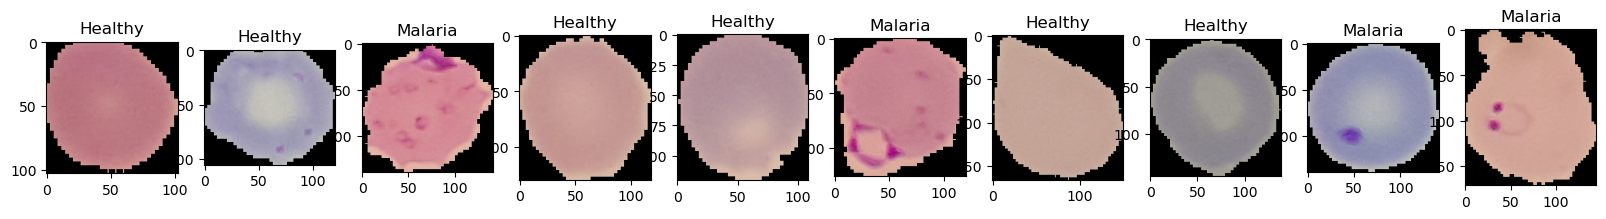

In [16]:
n_images = 10

# select some images from the dataset
images = train_ds.take(n_images)

fig, axes = plt.subplots(1, n_images, figsize=(20, 5), dpi=100)
for ax, (image, label) in zip(axes, images):
    ax.imshow(image)
    ax.set_title("Healthy" if label.numpy() == 1 else "Malaria")

# Preprocess the dataset

For this dataset two preprocessing operations are required:
1. Resize all images to uniform width and height, and
2. normalize the pixel value range to [0,1].

Neural networks have a fixed architecture and can therefore only take inputs of equal dimensions. This is why we have to preprocess the images to have uniform dimensions. For the Malaria dataset, we downsample the images to be 40 pixels high and 40 pixels wide. We will need the `resize_with_pad` and `resize` functions from the `tf.image` module.

Normalization of the pixel range to a [0,1] range is done to improve the stability of the weight updates. The Malaria dataset contains 8-bit RGB images, which have a maximum pixel value of 255 and a minimum of 0. If we would train the neural network using pixel values in the [0,255] range, the network's weights could grow too large causing high values during backpropagation and unstable training.

In [17]:
# define the first preprocessing function
# note: in this function we also cast the images to the float32 data type.

image_width, image_height = 40, 40
def resize_images(image, label):
    return (
        tf.cast(tf.image.resize_with_pad(tf.image.resize(image, (image_width, image_height)), image_width, image_height), tf.float32), 
        tf.cast(label, tf.float32)
    )

In [18]:
# define the second preprocessing function
def minmax_normalization(image, label):
    return (
        image / tf.math.reduce_max(tf.reshape(image, [-1, image.shape[-1]]), axis=0), # divide each pixel in the image by the maximum value in each channel (R, G, and B)
        label
    )

**TASK 2** 

Apply both preprocessing functions to the train and test dataset defined earlier. Have a look at the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) to see how you can *map* a function over the elements of a dataset.

In [19]:
# apply resize images
train_ds = train_ds.map(resize_images)
test_ds = test_ds.map(resize_images)

In [20]:
# apply minmax
train_ds = train_ds.map(minmax_normalization)
test_ds = train_ds.map(minmax_normalization)

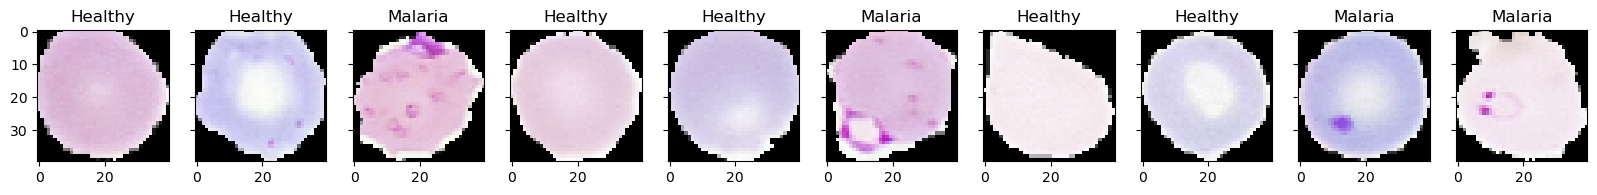

In [21]:
# have a look at the preprocessed images...

n_images = 10
fig, axes = plt.subplots(1, n_images, figsize=(20, 5), dpi=100, sharex=True, sharey=True)
for ax, (image, label) in zip(axes, train_ds.take(n_images)):
    ax.imshow(image.numpy())
    ax.set_title("Healthy" if label.numpy() == 1 else "Malaria")

The data is now preprocessed and ready to handled by the neural network that we will define in the next part.

# Define a neural network architecture for image classification

We need a neural network that is capable of classifying cell images in a positive and negative class. In this case, we want it to distinguishing between a healthy and parasitized cell based on a 40x40 RGB image. For today's standards this specific problem is a fairly easy computer vision task. A simple (and efficient) _shallow_ convolutional neural network (CNN) will suffice.

## CNN Architecture

The neural network will consist out of 4 main layers: 2 feature extraction layers, and 2 classification layers.

### Feature extraction

The feature extraction layers will learn to extract relevant features from the image. These features enable the classification layers to learn to classify cells into the healthy or parasitized category. The feature extraction layers are made up of convolution and max-pooling operations, and activation functions.

![Convolution](images/convolution_overview.gif "convolution")
![Max pooling](images/maxpool_animation.gif "maxpool")

(from https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks?hl=ru)

### Classification 

The extracted features get passed on to the classification layers. These are made up of densely connected layers, dropout connections and activation functions.

![Dropout](images/dropout.gif "dropout")

(from https://nagadakos.github.io/2018/09/23/dropout-effect-discussion/)

### Activation functions

The activation functions used in this neural network are the sigmoid, and Rectified Linear Unit (ReLU). 
![ReLU](images/relu.png "ReLU")

The ReLU is used as the intermediate activation function in the feature extraction and classification layers. This function is used in many state-of-the-art image classification networks. It works well because it prevents the gradients from *vanishing* during backpropagation. The SELU activation is also frequently used, and adds some theoretical convergence guarantees.

![Sigmoid](images/sigmoid.png "Sigmoid")

The sigmoid is the activation function applied to the output of the final densely connected layer. It squeezes whatever value comes out of the network to the 0-1 range. Ideal, for binary classification!

## Architecture diagram

![SegmentLocal](images/network-page-001.jpg "Network diagram")

**TASK 3** 

Define a CNN architecture with the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) using the above scheme as a guideline. Feel free to try out some of your own settings! The network takes RGB images as input, and has one output neuron that will produce output values between 0 (malaria) and 1 (healthy).

You will need the following layers:
- `tf.keras.layers.Conv2D`
- `tf.keras.layers.MaxPool2D`
- `tf.keras.layers.ReLU`
- `tf.keras.layers.Flatten`
- `tf.keras.layers.Dense`
- `tf.keras.layers.Dropout`

In [22]:
with tf.device(device):
    classifier = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=2, kernel_size=3, strides=(1,1), padding="same"),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Conv2D(filters=2, kernel_size=3, strides=(2,2), padding="same"),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

# Define the loss function, optimizer, and metrics

To optimize the parameters of the network we need an optimization algorithm, and a loss function to minize. In this particular case the binary cross-entropy is a good choice.

In [23]:
bce_loss = tf.keras.losses.BinaryCrossentropy()

 As optimization algorithm we choose stochastic gradient descent (SGD). More advanced optimizers exist, but SGD is a good first choice.

In [24]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

The binary cross-entropy is a good metric for optimization, but is less interpretable. Accuracy is a more intuitive metric for assessing model performance.

In [25]:
with tf.device(device):
    accuracy_metric = tf.keras.metrics.BinaryAccuracy()

Finally, TensorFlow requires us to `compile` all parts of the learning procedure together.

In [26]:
with tf.device(device):
    classifier.compile(optimizer=sgd_optimizer, loss=bce_loss, metrics=[accuracy_metric])

# Run learning procedure to train the network's parameters

First, we define some constants for the learning procedure.

In [27]:
epochs = 30 # How many times will the network see all training data
batch_size = 256 # How many instances will the network process in one iteration

train_len = int(builder.info.splits["train"].num_examples*0.8)
test_len = int(builder.info.splits["train"].num_examples*0.2)
steps_per_epoch = train_len//batch_size
test_steps = test_len//batch_size

Next, we iteratively update the parameters of the network using mini-batches of data (of size `batch_size`). In other words, we fit the network to the data. In pseudo-code:
```
for epoch in epochs:
    for true_labels, batch in batches:
        predictions = network(batch)
        loss = loss_function(true_labels, predictions)
        optimizer.update(network, loss)
```
The TensorFlow Keras API has several utitility functions that wrap basic procedures in helper functions. One such function is `fit` ([documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit)). It performs something close to the above pseudo-code on our network. All we have to do, is pass it the constants we defined above. Using helper functions is good practice as it lets us write code quicker, and it is less error-prone. However, always know what the helper functions do exactly!

Note that we save the return value of the fit function to a variable. It contains important information about the performance of our network. We will analyze this in the next part.

In [28]:
with tf.device(device):
    history = classifier.fit(
        train_ds.batch(batch_size).repeat(), # on which data to we want to train
        epochs=30, # how many epochs do we want to run
        steps_per_epoch=steps_per_epoch, # how many steps are in one epoch
        validation_data=test_ds.batch(batch_size).repeat(), # what test data do we want to use
        validation_steps=test_steps # how many steps do we need to take when testing
    )

Epoch 1/30
86/86 [==============================] - 31s 67ms/step - loss: 0.6908 - binary_accuracy: 0.5270 - val_loss: 0.6845 - val_binary_accuracy: 0.5787
Epoch 2/30
86/86 [==============================] - 5s 56ms/step - loss: 0.6841 - binary_accuracy: 0.5539 - val_loss: 0.6957 - val_binary_accuracy: 0.5112
Epoch 3/30
86/86 [==============================] - 5s 55ms/step - loss: 0.6803 - binary_accuracy: 0.5635 - val_loss: 0.6693 - val_binary_accuracy: 0.6044
Epoch 4/30
86/86 [==============================] - 5s 57ms/step - loss: 0.6772 - binary_accuracy: 0.5707 - val_loss: 0.6654 - val_binary_accuracy: 0.6198
Epoch 5/30
86/86 [==============================] - 5s 57ms/step - loss: 0.6732 - binary_accuracy: 0.5819 - val_loss: 0.6537 - val_binary_accuracy: 0.6337
Epoch 6/30
86/86 [==============================] - 5s 54ms/step - loss: 0.6684 - binary_accuracy: 0.5874 - val_loss: 0.6668 - val_binary_accuracy: 0.5869
Epoch 7/30
86/86 [==============================] - 5s 56ms/step - lo

**TASK 5**

Before doing this task, go to [Inspect classifier performance](#Inspect-classifier-performance). Afterwards, return to this task.

For now, we have used the SGD optimizer. Many other optimizers exist, such as the Adam optimizer. This optimizer combines two extensions of SGD into one powerful optimizer. Try to use the Adam optimizer to fit the neural network. See how the training progresses, do you notice any difference compared to SGD?

**NOTE**: In order to retrain the classifier with another optimizer you have to reinstantiate the classifier.

In [29]:
with tf.device(device):
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    classifier.compile(optimizer=adam_optimizer, loss=bce_loss, metrics=[accuracy_metric])

In [30]:
with tf.device(device):
    history = classifier.fit(
        train_ds.batch(batch_size).repeat(), # on which data to we want to train
        epochs=15, # how many epochs do we want to run
        steps_per_epoch=steps_per_epoch, # how many steps are in one epoch
        validation_data=test_ds.batch(batch_size).repeat(), # what test data do we want to use
        validation_steps=test_steps # how many steps do we need to take when testing
    )

Epoch 1/15
86/86 [==============================] - 7s 67ms/step - loss: 0.2916 - binary_accuracy: 0.9142 - val_loss: 0.1982 - val_binary_accuracy: 0.9297
Epoch 2/15
86/86 [==============================] - 5s 59ms/step - loss: 0.2839 - binary_accuracy: 0.9134 - val_loss: 0.2030 - val_binary_accuracy: 0.9202
Epoch 3/15
86/86 [==============================] - 5s 61ms/step - loss: 0.2762 - binary_accuracy: 0.9166 - val_loss: 0.2089 - val_binary_accuracy: 0.9353
Epoch 4/15
86/86 [==============================] - 5s 60ms/step - loss: 0.2788 - binary_accuracy: 0.9142 - val_loss: 0.1930 - val_binary_accuracy: 0.9381
Epoch 5/15
86/86 [==============================] - 5s 61ms/step - loss: 0.2620 - binary_accuracy: 0.9139 - val_loss: 0.1808 - val_binary_accuracy: 0.9295
Epoch 6/15
86/86 [==============================] - 5s 61ms/step - loss: 0.2532 - binary_accuracy: 0.9179 - val_loss: 0.1760 - val_binary_accuracy: 0.9405
Epoch 7/15
86/86 [==============================] - 5s 59ms/step - los

# Inspect classifier performance

After fitting the network, we are interested in its eventual performance and how this evolved during the fitting procedure. By comparing metrics computed on the training and test dataset we can spot overfitting as well: if the training accuracy is much higher compared to testing, the network is overfitting.

The information we need, is returned by the fit function in a [`History`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History) object.

**TASK 6** 

Plot the the accuracy and loss in function of the epochs for the train and validation set. Use the history object, returned by the `fit` function.

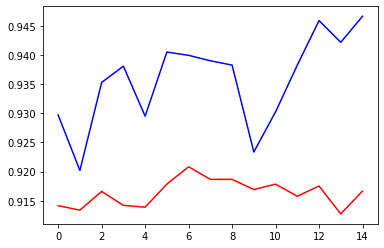

In [31]:
# plot binary_accury and val_binary_accuracy

plt.plot(history.epoch, history.history["binary_accuracy"], color="red")
plt.plot(history.epoch, history.history["val_binary_accuracy"], color="blue")

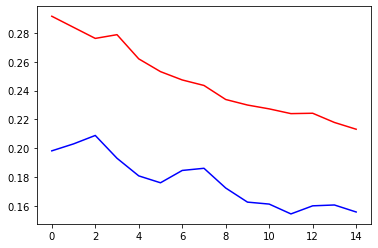

In [32]:
# plot loss and val_loss

plt.plot(history.epoch, history.history["loss"], color="red")
plt.plot(history.epoch, history.history["val_loss"], color="blue")

**TASK 6**

Use the trained network to compute prediction scores for the test dataset. Use these scores to compute the confusion matrix and ROC AUC score.

In [33]:
from sklearn.metrics import confusion_matrix, roc_auc_score
true = [l.numpy() for i,l in test_ds.take(-1)]

In [34]:
scores = classifier.predict(test_ds.batch(batch_size)).ravel()

In [35]:
print(confusion_matrix(true, scores > 0.5))

[[10416   583]
 [  578 10469]]


In [36]:
roc_auc_score(true, scores > 0.5)

0.9473366420162147

# Extra: A look at intermediate representations of the network

As an image passes through our convolutional neural network, it is transformed by the operations defined in the layers. Each transformation extracts the most relevant information from the input it receives, and passes it on to the next layer. The output of each intermediate layer is called a feature map or *representation*.

By recording these intermediate representations for an image, we get an idea of what the network is focusing on to make its prediction. This way, we get some insight into the so-called *black-box model*.

In this last part we will look at some of the representations learned by the network we trained. Before running the code, think about what these representations might look like.

In [37]:
# extract some images to analyse
n_images = 10
it = iter(test_ds.batch(n_images))
images, labels = next(it)

# get the predictions
predictions = classifier.predict(images)

# record the intermediate representations
representations = []
record = [1, 2, 3]
x = images
for i, layer in enumerate(classifier.layers):
    x = layer(x)
    if i in record:
        representations.append(x)

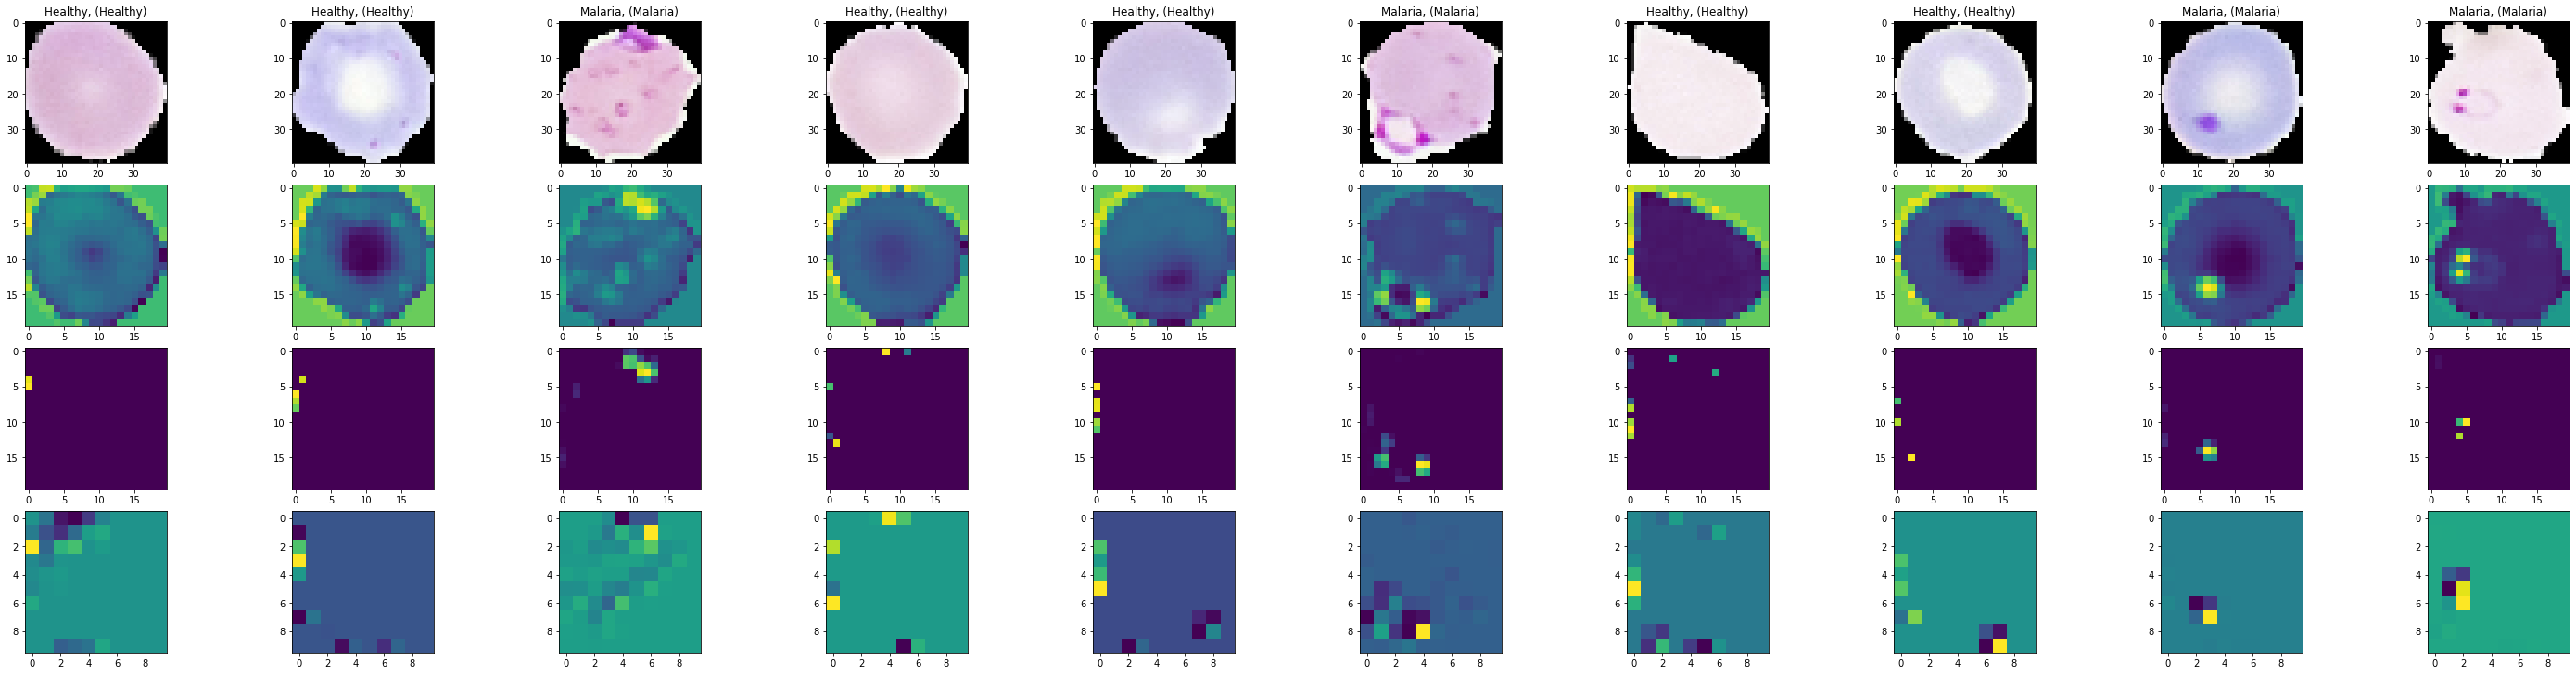

In [38]:
fig, axes = plt.subplots(1+len(representations), len(images), figsize=(40, 10), constrained_layout=True)
    
for ax,img,label,prediction in zip(axes[0, :], images, labels, predictions):
    ax.imshow(img)
    txt_label = "Healthy" if label.numpy() == 1 else "Malaria"
    txt_pred = "Healthy" if prediction > 0.5 else "Malaria"
    ax.set_title(f"{txt_label}, ({txt_pred})")
    
for reps, row in zip(representations, axes[1:, :]):
    for rep, ax in zip(reps, row):
        ax.imshow(rep[..., 0])